<a href="https://colab.research.google.com/github/sayeeshruthiwindsor/MNIST-CNN/blob/main/ActivationFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

Prepare the data


In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


Model
784 input,512 hidden layers, 10 nodes

In [17]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape= (784,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


train with 5 epoch


Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.4254 - accuracy: 0.8763 - val_loss: 0.1210 - val_accuracy: 0.9626
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1069 - accuracy: 0.9695 - val_loss: 0.0873 - val_accuracy: 0.9743
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0688 - accuracy: 0.9795 - val_loss: 0.0748 - val_accuracy: 0.9759
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0829 - val_accuracy: 0.9755
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0346 - accuracy: 0.9898 - val_loss: 0.0690 - val_accuracy: 0.9793
Test loss: 0.069
Test accuracy: 0.979


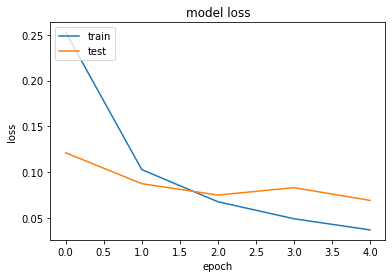

In [18]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

All activation functions 

In [ ]:

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    plt.plot(history.history['val_acc'])
    
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.5206 - accuracy: 0.8468 - val_loss: 0.3357 - val_accuracy: 0.9025
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3095 - accuracy: 0.9112 - val_loss: 0.2973 - val_accuracy: 0.9143
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2929 - accuracy: 0.9172 - val_loss: 0.3065 - val_accuracy: 0.9152
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2914 - accuracy: 0.9192 - val_loss: 0.2860 - val_accuracy: 0.9234
Epoch 5/5
223/469 [=============>................] - ETA: 2s - loss: 0.2679 - accuracy: 0.9256